In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
nurseryNum = pd.read_csv("nursery_numerical.csv")
nurseryNum.columns.values

array(['Parents', ' Has_nurs', ' Form', ' Children', ' Housing',
       ' Finance', ' Social', ' Health', 'Class'], dtype=object)

In [3]:
i = 100
j = 1
features = ['Parents', ' Has_nurs', ' Form', ' Children', ' Housing', ' Finance', ' Social', ' Health']
for index, m in nurseryNum.iterrows():
    if index % 40 == 0:
        nurseryNum.at[index+2, features[j]] = i + 1
        j += 3
        i+=10
        if j >= 7:
            j = 0

In [4]:
i = 0
j = 0
for index, m in nurseryNum.iterrows():
    if index % 40 == 0:
        if index < 12954:
            nurseryNum.at[index+4,:] = nurseryNum.loc[j,:]
        else:
            nurseryNum.at[index+1,:] = nurseryNum.loc[j,:]
        j += 120
        if j >= 12959:
            j = 0

In [5]:
nurseryNum.to_csv('/home/valia/Documents/AppliedDataScience/nureryNoise5perCent.csv', sep=',')

In [6]:
data = nurseryNum.iloc[:,0:8]
labels = nurseryNum.iloc[:,8]

In [7]:
kf = KFold(n_splits=2, shuffle=True) #5 fores me 2 folds

### Euclidean and k tuning on 5% noise dataset

In [8]:
acc = []
mean_accuracy_model_euclidean = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=1, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

mean_accuracy_model1 =  sum(acc)/10    
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model1

              precision    recall  f1-score   support

  very_recom       0.82      0.86      0.84      2145
    priority       0.78      0.81      0.79      2163
  spec_prior       0.40      1.00      0.57         2
   recommend       0.87      0.77      0.81      2007
   not_recom       0.58      0.68      0.63       163

   micro avg       0.81      0.81      0.81      6480
   macro avg       0.69      0.82      0.73      6480
weighted avg       0.81      0.81      0.81      6480

accuracy:  0.8101851851851852
              precision    recall  f1-score   support

  very_recom       0.82      0.83      0.83      2138
    priority       0.76      0.80      0.78      2110
  spec_prior       0.50      1.00      0.67         3
   recommend       0.85      0.77      0.81      2070
   not_recom       0.56      0.76      0.64       159

   micro avg       0.80      0.80      0.80      6480
   macro avg       0.70      0.83      0.74      6480
weighted avg       0.80      0.80      0.80    

/home/valia/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

  very_recom       0.82      0.86      0.84      2101
    priority       0.77      0.82      0.79      2179
  spec_prior       0.00      0.00      0.00         5
   recommend       0.87      0.75      0.81      2031
   not_recom       0.57      0.71      0.63       164

   micro avg       0.81      0.81      0.81      6480
   macro avg       0.61      0.63      0.61      6480
weighted avg       0.81      0.81      0.81      6480

accuracy:  0.8083333333333333


/home/valia/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

  very_recom       0.85      0.85      0.85      2182
    priority       0.76      0.83      0.80      2094
  spec_prior       0.00      0.00      0.00         0
   recommend       0.87      0.77      0.82      2046
   not_recom       0.57      0.76      0.65       158

   micro avg       0.82      0.82      0.82      6480
   macro avg       0.61      0.64      0.62      6480
weighted avg       0.82      0.82      0.82      6480

accuracy:  0.8157407407407408
              precision    recall  f1-score   support

  very_recom       0.82      0.83      0.83      2181
    priority       0.76      0.81      0.78      2110
  spec_prior       0.50      1.00      0.67         3
   recommend       0.86      0.75      0.80      2033
   not_recom       0.50      0.73      0.59       153

   micro avg       0.80      0.80      0.80      6480
   macro avg       0.69      0.82      0.73      6480
weighted avg       0.80      0.80      0.80    

In [9]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=5, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

mean_accuracy_model1 =  sum(acc)/10    
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model1

              precision    recall  f1-score   support

  very_recom       0.92      0.96      0.94      2120
    priority       0.88      0.92      0.90      2153
  spec_prior       0.40      1.00      0.57         2
   recommend       0.95      0.87      0.91      2057
   not_recom       0.94      0.72      0.81       148

   micro avg       0.91      0.91      0.91      6480
   macro avg       0.82      0.89      0.83      6480
weighted avg       0.92      0.91      0.91      6480

accuracy:  0.9141975308641975
              precision    recall  f1-score   support

  very_recom       0.93      0.96      0.95      2163
    priority       0.87      0.93      0.90      2120
  spec_prior       0.33      0.67      0.44         3
   recommend       0.94      0.86      0.89      2020
   not_recom       0.96      0.62      0.75       174

   micro avg       0.91      0.91      0.91      6480
   macro avg       0.80      0.81      0.79      6480
weighted avg       0.91      0.91      0.91    

In [10]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=10, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

mean_accuracy_model1 =  sum(acc)/10    
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model1

              precision    recall  f1-score   support

  very_recom       0.92      0.97      0.94      2115
    priority       0.87      0.92      0.89      2161
  spec_prior       0.00      0.00      0.00         1
   recommend       0.95      0.84      0.89      2056
   not_recom       0.86      0.78      0.81       147

   micro avg       0.91      0.91      0.91      6480
   macro avg       0.72      0.70      0.71      6480
weighted avg       0.91      0.91      0.91      6480

accuracy:  0.9080246913580247
              precision    recall  f1-score   support

  very_recom       0.94      0.96      0.95      2168
    priority       0.85      0.94      0.89      2112
  spec_prior       0.00      0.00      0.00         4
   recommend       0.94      0.84      0.89      2021
   not_recom       0.92      0.70      0.79       175

   micro avg       0.91      0.91      0.91      6480
   macro avg       0.73      0.69      0.71      6480
weighted avg       0.91      0.91      0.91    

In [11]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=15, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

mean_accuracy_model1 =  sum(acc)/10    
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model1

              precision    recall  f1-score   support

  very_recom       0.94      0.96      0.95      2141
    priority       0.86      0.93      0.90      2148
  spec_prior       0.00      0.00      0.00         3
   recommend       0.93      0.85      0.89      2021
   not_recom       0.93      0.67      0.78       167

   micro avg       0.91      0.91      0.91      6480
   macro avg       0.73      0.68      0.70      6480
weighted avg       0.91      0.91      0.91      6480

accuracy:  0.9100308641975309
              precision    recall  f1-score   support

  very_recom       0.95      0.95      0.95      2142
    priority       0.86      0.93      0.89      2125
  spec_prior       0.00      0.00      0.00         2
   recommend       0.92      0.85      0.88      2056
   not_recom       0.96      0.71      0.82       155

   micro avg       0.91      0.91      0.91      6480
   macro avg       0.74      0.69      0.71      6480
weighted avg       0.91      0.91      0.91    

In [12]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=20, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

mean_accuracy_model1 =  sum(acc)/10    
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model1

              precision    recall  f1-score   support

  very_recom       0.96      0.96      0.96      2166
    priority       0.87      0.93      0.90      2146
  spec_prior       0.00      0.00      0.00         3
   recommend       0.91      0.87      0.89      2008
   not_recom       0.97      0.61      0.75       157

   micro avg       0.91      0.91      0.91      6480
   macro avg       0.74      0.67      0.70      6480
weighted avg       0.91      0.91      0.91      6480

accuracy:  0.9135802469135802
              precision    recall  f1-score   support

  very_recom       0.93      0.97      0.95      2117
    priority       0.87      0.91      0.89      2127
  spec_prior       0.00      0.00      0.00         2
   recommend       0.93      0.87      0.90      2069
   not_recom       0.92      0.55      0.69       165

   micro avg       0.91      0.91      0.91      6480
   macro avg       0.73      0.66      0.69      6480
weighted avg       0.91      0.91      0.91    

In [13]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=30, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

mean_accuracy_model1 =  sum(acc)/10    
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model1

              precision    recall  f1-score   support

  very_recom       0.90      0.96      0.93      2150
    priority       0.85      0.92      0.88      2100
  spec_prior       0.00      0.00      0.00         4
   recommend       0.93      0.84      0.88      2057
   not_recom       0.92      0.38      0.54       169

   micro avg       0.89      0.89      0.89      6480
   macro avg       0.72      0.62      0.65      6480
weighted avg       0.89      0.89      0.89      6480

accuracy:  0.8921296296296296
              precision    recall  f1-score   support

  very_recom       0.94      0.94      0.94      2133
    priority       0.88      0.91      0.90      2173
  spec_prior       0.00      0.00      0.00         1
   recommend       0.90      0.89      0.90      2020
   not_recom       0.98      0.54      0.70       153

   micro avg       0.91      0.91      0.91      6480
   macro avg       0.74      0.66      0.69      6480
weighted avg       0.91      0.91      0.91    

In [14]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=50, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

mean_accuracy_model1 =  sum(acc)/10    
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model1

              precision    recall  f1-score   support

  very_recom       0.84      0.92      0.88      2118
    priority       0.85      0.87      0.86      2136
  spec_prior       0.00      0.00      0.00         4
   recommend       0.90      0.83      0.86      2072
   not_recom       0.94      0.39      0.55       150

   micro avg       0.86      0.86      0.86      6480
   macro avg       0.70      0.60      0.63      6480
weighted avg       0.86      0.86      0.86      6480

accuracy:  0.8598765432098765
              precision    recall  f1-score   support

  very_recom       0.90      0.90      0.90      2165
    priority       0.84      0.90      0.87      2137
  spec_prior       0.00      0.00      0.00         1
   recommend       0.88      0.85      0.87      2005
   not_recom       0.96      0.29      0.45       172

   micro avg       0.87      0.87      0.87      6480
   macro avg       0.72      0.59      0.62      6480
weighted avg       0.87      0.87      0.87    

In [15]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=100, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

mean_accuracy_model1 =  sum(acc)/10    
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model1

              precision    recall  f1-score   support

  very_recom       0.74      0.84      0.79      2114
    priority       0.82      0.82      0.82      2156
  spec_prior       0.00      0.00      0.00         2
   recommend       0.86      0.79      0.82      2051
   not_recom       0.94      0.19      0.32       157

   micro avg       0.80      0.80      0.80      6480
   macro avg       0.67      0.53      0.55      6480
weighted avg       0.81      0.80      0.80      6480

accuracy:  0.8012345679012346
              precision    recall  f1-score   support

  very_recom       0.78      0.81      0.80      2169
    priority       0.81      0.84      0.82      2117
  spec_prior       0.00      0.00      0.00         3
   recommend       0.82      0.81      0.81      2026
   not_recom       0.81      0.10      0.18       165

   micro avg       0.80      0.80      0.80      6480
   macro avg       0.64      0.51      0.52      6480
weighted avg       0.80      0.80      0.79    

In [16]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=150, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

mean_accuracy_model1 =  sum(acc)/10    
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model1

              precision    recall  f1-score   support

  very_recom       0.72      0.72      0.72      2151
    priority       0.77      0.82      0.79      2133
  spec_prior       0.00      0.00      0.00         3
   recommend       0.78      0.78      0.78      2024
   not_recom       0.50      0.02      0.03       169

   micro avg       0.75      0.75      0.75      6480
   macro avg       0.55      0.47      0.46      6480
weighted avg       0.75      0.75      0.74      6480

accuracy:  0.7533950617283951
              precision    recall  f1-score   support

  very_recom       0.63      0.76      0.69      2132
    priority       0.79      0.74      0.77      2140
  spec_prior       0.00      0.00      0.00         2
   recommend       0.80      0.74      0.77      2053
   not_recom       0.93      0.08      0.16       153

   micro avg       0.73      0.73      0.73      6480
   macro avg       0.63      0.47      0.48      6480
weighted avg       0.74      0.73      0.73    

[0.8073611111111113, 0.9056018518518518, 0.9083641975308643, 0.9100462962962963, 0.916219135802469, 0.9009413580246914, 0.8647067901234567, 0.7975308641975308, 0.7458487654320988]


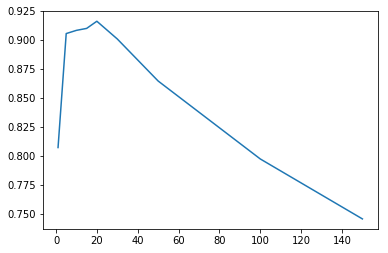

In [17]:
print mean_accuracy_model_euclidean
k = [1, 5, 10, 15, 20, 30, 50, 100, 150]
fig = plt.figure()
ax = plt.axes()
ax.plot(k, mean_accuracy_model_euclidean)
plt.show()

### Minkowski and k tuning on 5% noise dataset

In [18]:
acc = []
mean_accuracy_model_minkowski = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=1, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model10 = sum(acc)/10  
mean_accuracy_model_minkowski.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model10

set([' very_recom', ' priority', ' spec_prior', ' recommend', ' not_recom'])
              precision    recall  f1-score   support

  very_recom       0.84      0.85      0.85      2159
    priority       0.79      0.83      0.81      2188
  spec_prior       0.33      1.00      0.50         2
   recommend       0.85      0.78      0.82      1973
   not_recom       0.61      0.77      0.68       158

   micro avg       0.82      0.82      0.82      6480
   macro avg       0.69      0.85      0.73      6480
weighted avg       0.82      0.82      0.82      6480

accuracy:  0.8194444444444444
set([' very_recom', ' priority', ' spec_prior', ' recommend', ' not_recom'])
              precision    recall  f1-score   support

  very_recom       0.81      0.86      0.84      2124
    priority       0.77      0.82      0.79      2085
  spec_prior       0.50      1.00      0.67         3
   recommend       0.87      0.74      0.80      2104
   not_recom       0.58      0.72      0.64       164

 

In [19]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=5, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model_minkowski.append(sum(acc)/10)


set([' very_recom', ' priority', ' spec_prior', ' recommend', ' not_recom'])
              precision    recall  f1-score   support

  very_recom       0.92      0.96      0.94      2122
    priority       0.86      0.93      0.89      2142
  spec_prior       0.10      1.00      0.18         1
   recommend       0.95      0.85      0.90      2054
   not_recom       0.95      0.58      0.72       161

   micro avg       0.91      0.91      0.91      6480
   macro avg       0.76      0.87      0.73      6480
weighted avg       0.91      0.91      0.91      6480

accuracy:  0.9067901234567901
              precision    recall  f1-score   support

  very_recom       0.93      0.96      0.94      2161
    priority       0.88      0.92      0.90      2131
  spec_prior       0.00      0.00      0.00         4
   recommend       0.94      0.88      0.91      2023
   not_recom       0.89      0.66      0.76       161

   micro avg       0.91      0.91      0.91      6480
   macro avg       0.73 

In [20]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=10, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model_minkowski.append(sum(acc)/10)


set([' very_recom', ' priority', ' spec_prior', ' recommend', ' not_recom'])
              precision    recall  f1-score   support

  very_recom       0.94      0.96      0.95      2176
    priority       0.86      0.92      0.89      2114
  spec_prior       0.00      0.00      0.00         2
   recommend       0.93      0.86      0.90      2029
   not_recom       0.86      0.67      0.76       159

   micro avg       0.91      0.91      0.91      6480
   macro avg       0.72      0.68      0.70      6480
weighted avg       0.91      0.91      0.91      6480

accuracy:  0.9098765432098765
              precision    recall  f1-score   support

  very_recom       0.91      0.97      0.94      2107
    priority       0.86      0.92      0.89      2159
  spec_prior       0.00      0.00      0.00         3
   recommend       0.95      0.83      0.89      2048
   not_recom       0.91      0.64      0.75       163

   micro avg       0.90      0.90      0.90      6480
   macro avg       0.72 

In [21]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=15, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model_minkowski.append(sum(acc)/10)


              precision    recall  f1-score   support

  very_recom       0.96      0.95      0.95      2153
    priority       0.87      0.93      0.90      2128
  spec_prior       0.00      0.00      0.00         4
   recommend       0.91      0.87      0.89      2033
   not_recom       0.94      0.65      0.77       162

   micro avg       0.91      0.91      0.91      6480
   macro avg       0.73      0.68      0.70      6480
weighted avg       0.91      0.91      0.91      6480

accuracy:  0.9111111111111111
              precision    recall  f1-score   support

  very_recom       0.95      0.96      0.95      2130
    priority       0.86      0.93      0.90      2145
  spec_prior       0.00      0.00      0.00         1
   recommend       0.92      0.87      0.89      2044
   not_recom       0.95      0.59      0.73       160

   micro avg       0.91      0.91      0.91      6480
   macro avg       0.74      0.67      0.69      6480
weighted avg       0.91      0.91      0.91    

In [22]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=20, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model_minkowski.append(sum(acc)/10)


              precision    recall  f1-score   support

  very_recom       0.95      0.96      0.95      2157
    priority       0.87      0.93      0.90      2125
  spec_prior       0.00      0.00      0.00         4
   recommend       0.93      0.89      0.91      2028
   not_recom       0.94      0.51      0.66       166

   micro avg       0.92      0.92      0.92      6480
   macro avg       0.74      0.66      0.69      6480
weighted avg       0.92      0.92      0.92      6480

accuracy:  0.917283950617284
              precision    recall  f1-score   support

  very_recom       0.94      0.97      0.96      2126
    priority       0.87      0.92      0.89      2148
  spec_prior       0.00      0.00      0.00         1
   recommend       0.93      0.86      0.89      2049
   not_recom       0.96      0.67      0.79       156

   micro avg       0.91      0.91      0.91      6480
   macro avg       0.74      0.69      0.71      6480
weighted avg       0.91      0.91      0.91     

In [23]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=30, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model_minkowski.append(sum(acc)/10)


              precision    recall  f1-score   support

  very_recom       0.91      0.96      0.93      2148
    priority       0.87      0.91      0.89      2140
  spec_prior       0.00      0.00      0.00         3
   recommend       0.92      0.86      0.89      2028
   not_recom       0.95      0.47      0.63       161

   micro avg       0.90      0.90      0.90      6480
   macro avg       0.73      0.64      0.67      6480
weighted avg       0.90      0.90      0.90      6480

accuracy:  0.9003086419753087
              precision    recall  f1-score   support

  very_recom       0.92      0.95      0.94      2135
    priority       0.87      0.91      0.89      2133
  spec_prior       0.00      0.00      0.00         2
   recommend       0.91      0.87      0.89      2049
   not_recom       0.96      0.44      0.60       161

   micro avg       0.90      0.90      0.90      6480
   macro avg       0.73      0.63      0.66      6480
weighted avg       0.90      0.90      0.90    

In [24]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=50, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model_minkowski.append(sum(acc)/10)


              precision    recall  f1-score   support

  very_recom       0.83      0.93      0.88      2067
    priority       0.83      0.87      0.85      2190
  spec_prior       0.00      0.00      0.00         2
   recommend       0.90      0.78      0.84      2058
   not_recom       0.96      0.40      0.57       163

   micro avg       0.85      0.85      0.85      6480
   macro avg       0.70      0.60      0.63      6480
weighted avg       0.86      0.85      0.85      6480

accuracy:  0.850925925925926
              precision    recall  f1-score   support

  very_recom       0.91      0.88      0.90      2216
    priority       0.82      0.91      0.87      2083
  spec_prior       0.00      0.00      0.00         3
   recommend       0.88      0.86      0.87      2019
   not_recom       0.95      0.36      0.53       159

   micro avg       0.87      0.87      0.87      6480
   macro avg       0.71      0.60      0.63      6480
weighted avg       0.87      0.87      0.87     

In [25]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=100, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model_minkowski.append(sum(acc)/10)


              precision    recall  f1-score   support

  very_recom       0.70      0.85      0.77      2082
    priority       0.82      0.79      0.80      2167
  spec_prior       0.00      0.00      0.00         3
   recommend       0.85      0.76      0.80      2072
   not_recom       0.85      0.11      0.19       156

   micro avg       0.78      0.78      0.78      6480
   macro avg       0.64      0.50      0.51      6480
weighted avg       0.79      0.78      0.77      6480

accuracy:  0.7802469135802469
              precision    recall  f1-score   support

  very_recom       0.81      0.80      0.80      2201
    priority       0.81      0.86      0.84      2106
  spec_prior       0.00      0.00      0.00         2
   recommend       0.82      0.83      0.82      2005
   not_recom       0.93      0.16      0.27       166

   micro avg       0.81      0.81      0.81      6480
   macro avg       0.67      0.53      0.55      6480
weighted avg       0.81      0.81      0.81    

In [26]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=150, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model_minkowski.append(sum(acc)/10)


              precision    recall  f1-score   support

  very_recom       0.73      0.69      0.71      2196
    priority       0.77      0.82      0.79      2118
  spec_prior       0.00      0.00      0.00         2
   recommend       0.75      0.79      0.77      2008
   not_recom       0.93      0.09      0.16       156

   micro avg       0.75      0.75      0.75      6480
   macro avg       0.64      0.48      0.49      6480
weighted avg       0.75      0.75      0.74      6480

accuracy:  0.7501543209876543
              precision    recall  f1-score   support

  very_recom       0.63      0.80      0.70      2087
    priority       0.80      0.74      0.77      2155
  spec_prior       0.00      0.00      0.00         3
   recommend       0.82      0.73      0.77      2069
   not_recom       0.60      0.04      0.07       166

   micro avg       0.74      0.74      0.74      6480
   macro avg       0.57      0.46      0.46      6480
weighted avg       0.75      0.74      0.73    

[0.81375, 0.9074845679012344, 0.907175925925926, 0.9106790123456789, 0.9155246913580248, 0.9013888888888889, 0.8646913580246913, 0.7974074074074075, 0.7427314814814815]


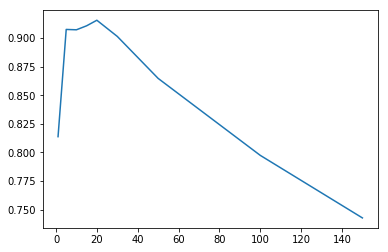

In [27]:
print mean_accuracy_model_minkowski
k = [1, 5, 10, 15, 20, 30, 50, 100, 150]
fig = plt.figure()
ax = plt.axes()
ax.plot(k, mean_accuracy_model_minkowski)
plt.show()

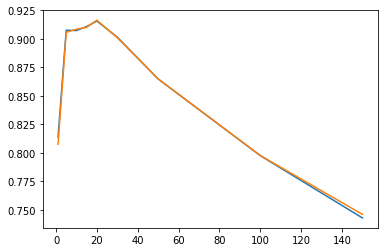

In [28]:
fig = plt.figure()
ax = plt.axes()
ax.plot(k, mean_accuracy_model_minkowski)
ax.plot(k, mean_accuracy_model_euclidean)
plt.show()